<a href="https://colab.research.google.com/github/Mahesh1717/EYE-DISEASE-CLASSIFICATION/blob/main/eye_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
from glob import glob

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
eye_diseases={'normal':0,'glaucoma':1,'diabetic_retinopathy':2,'cataract':3}

In [ ]:
def load_imgs(impath):
    imgs=[]
    label=[]
    plot=[]
    l1=os.listdir(impath)
    for i in l1:
        c=0
        l2=os.listdir(impath+'/'+i)
        for j in l2:
            if c<=2000:
                img=Image.open(impath+i+'/'+j)
                img=img.resize(size=(128,128))
                plot.append(img)
                #img=img.convert('L')
                img=np.array(img,dtype=np.float16)/255
                imgs.append(img) #.flatten())
                label.append(i)
                del img
                c=c+1


    return np.array(imgs),label,plot

In [ ]:
x,y,plot_imgs=load_imgs('/content/drive/Shareddrives/Project2024/major_project/dataset/')

In [ ]:
x.shape,len(y)

((4217, 128, 128, 3), 4217)

In [ ]:
x[500],y[0]

(array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=float16),
 'cataract')

In [ ]:
t=[]
for i in y:
  t.append(eye_diseases.get(i))

In [ ]:
t[0:4000:500]

[3, 3, 3, 1, 1, 0, 0, 2]

In [ ]:
target=pd.Series(t,dtype='category')

In [ ]:
print(target.value_counts())

2    1098
0    1074
3    1038
1    1007
dtype: int64


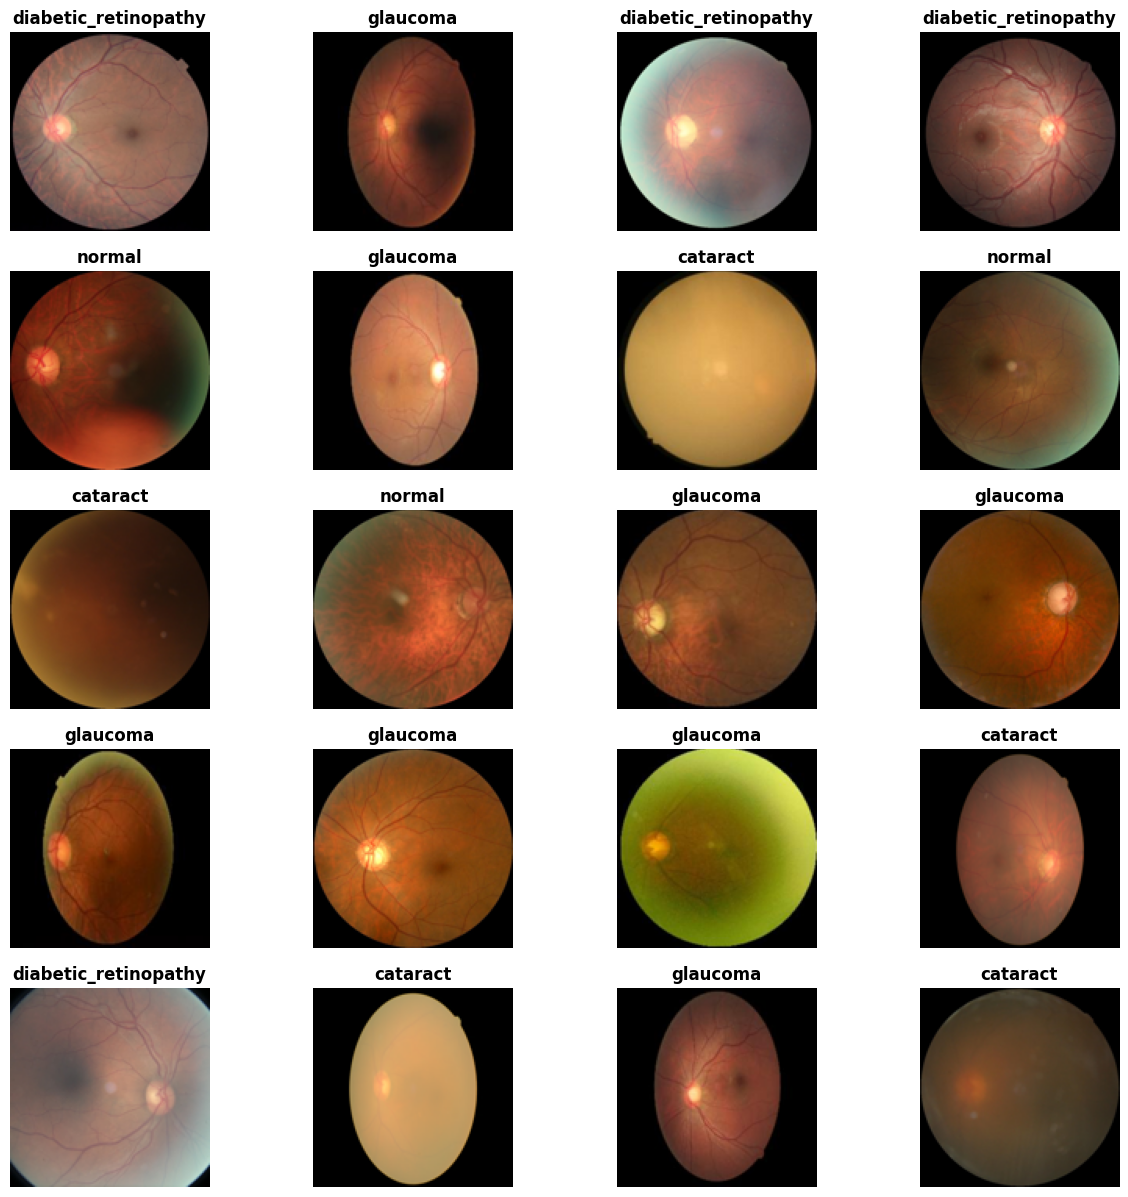

In [ ]:
fig=plt.figure(figsize=(15,15))
for i in range(1,21):
  img=np.random.randint(1,4217)
  fig.add_subplot(5,4,i)
  plt.imshow(plot_imgs[img])
  plt.title(y[int(img)],fontdict={'fontsize':12},weight='bold')
  plt.axis('off')


plt.show()


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import itertools
import tensorflow as tf
from tensorflow.keras import models
tf.config.run_functions_eagerly(True)
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet152, Xception,VGG16,EfficientNetB4
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,AveragePooling2D,GlobalMaxPooling2D,BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers.legacy import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
np.random.seed(123)
print("done")

done


In [ ]:
y1 = tf.keras.utils.to_categorical(target, num_classes=4)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.2,shuffle=True)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3373, 128, 128, 3), (844, 128, 128, 3), (3373, 4), (844, 4))

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 999)

In [ ]:
y_train[3]

array([0., 1., 0., 0.], dtype=float32)

In [ ]:
x_train.shape,x_validate.shape

((3035, 128, 128, 3), (338, 128, 128, 3))

In [ ]:
optimizer = Adam(learning_rate=0.001)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=4, verbose=1, factor=0.5, min_learning_rate=0.00001)
#mcp = tf.keras.callbacks.ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=10)

In [ ]:
#Basic CNN Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(128,128,3)))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 average_pooling2d_8 (Avera  (None, 64, 64, 64)        0         
 gePooling2D)                                                    
                                                                 
 dropout_10 (Dropout)        (None, 64, 64, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 64)        36928     
                                                      

In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train,y_train,epochs = 100, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 100
                              , callbacks=[learning_rate_reduction,es])

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
30/30 [==============================] - 14s 348ms/step - loss: 1.3556 - accuracy: 0.3321 - val_loss: 1.3262 - val_accuracy: 0.3846 - lr: 0.0010
Epoch 2/100
30/30 [==============================] - 7s 225ms/step - loss: 1.1965 - accuracy: 0.4484 - val_loss: 1.0717 - val_accuracy: 0.5296 - lr: 0.0010
Epoch 3/100
30/30 [==============================] - 7s 236ms/step - loss: 1.0196 - accuracy: 0.5265 - val_loss: 0.9268 - val_accuracy: 0.6243 - lr: 0.0010
Epoch 4/100
30/30 [==============================] - 7s 242ms/step - loss: 0.9036 - accuracy: 0.5825 - val_loss: 0.8488 - val_accuracy: 0.6479 - lr: 0.0010
Epoch 5/100
30/30 [==============================] - 7s 234ms/step - loss: 0.8376 - accuracy: 0.6290 - val_loss: 0.7939 - val_accuracy: 0.7308 - lr: 0.0010
Epoch 6/100
30/30 [==============================] - 7s 236ms/step - loss: 0.7395 - accuracy: 0.6804 - val_loss: 0.7134 - val_accuracy: 0.7041 - lr: 0.0010
Epoch 7/100
30/30 [==============================] - 7s 224ms/s